In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
from collections import Counter
import ast

In [2]:
train_df=pd.read_csv(r"train.csv")
test_df=pd.read_csv(r"test.csv")

In [3]:
train_df.shape,test_df.shape

((3000, 23), (4398, 22))

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [7]:
train_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [10]:
test_df.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


Number of missing values

In [15]:
train_df.isna().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
original_language           0
budget                      0
imdb_id                     0
revenue                     0
original_title              0
popularity                  0
release_date                0
status                      0
title                       0
id                          0
dtype: int64

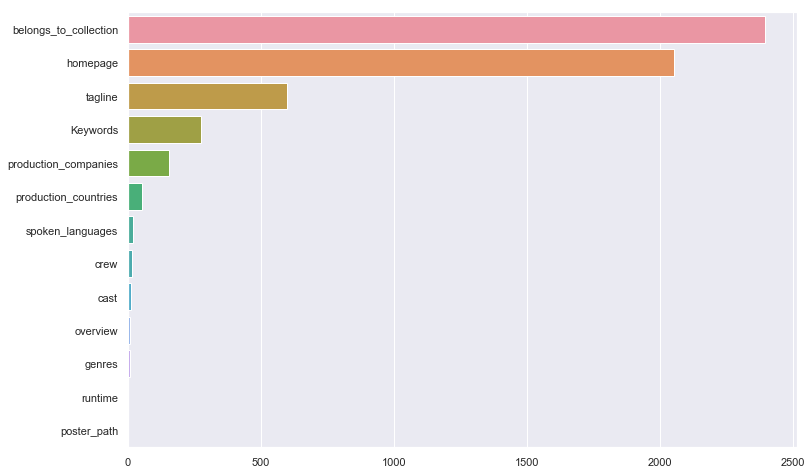

In [28]:
missing_train=train_df.isna().sum().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(missing_train.loc[:"poster_path"],missing_train.loc[:"poster_path"].index);

So, there are a couple of missing value which needed to be operated. Going through the datset we can find many columns that are string inside which there is a list and inside that their is a dictionary. So we need to convert those columns from string to dictionary

In [34]:
str_columns=["belongs_to_collection","genres","production_companies","production_countries","cast","crew"]

def str_to_dict(data):
    for col in str_columns:
        data[col]=data[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [35]:
str_to_dict(train_df)

Now we will deal with all the column one by one and see what these are referring to.

1. Belongs_to_collection 

In [46]:
train_df["belongs_to_collection"].apply(lambda x : 1 if x!={} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

The above results shows that there are 604 movies that have a prequel. Now lets see which movies has a maximum number of prequels.

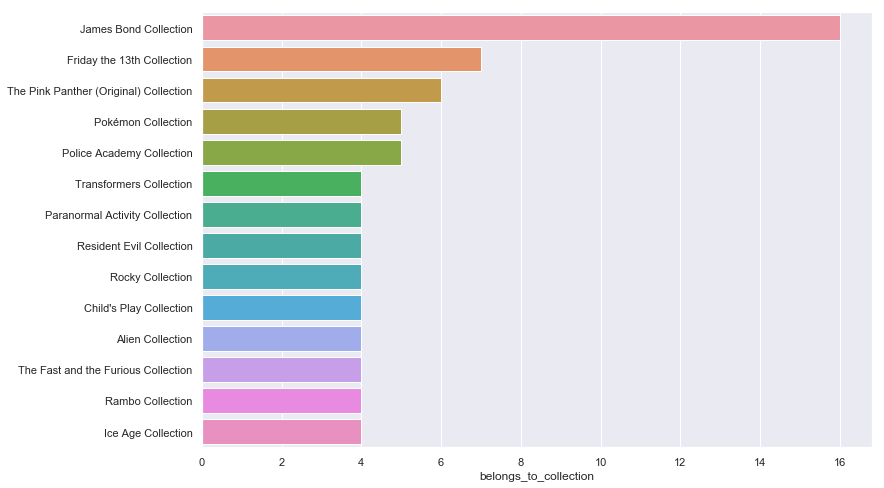

In [120]:
movie_coll=train_df["belongs_to_collection"].apply(lambda x: x[0]["name"] if x!={} else 0).value_counts()[1:15]
sns.barplot(movie_coll,movie_coll.index);

James Bond collection consists of total 16 number of movies followed by Friday the 13th and so on.

2. Genre

We will look for the most common genre that is present in the movies.

In [72]:
genre_df=train_df.genres.apply(lambda x: [i["name"] for i in x] if x!= {} else [])

In [95]:
count=Counter([k for gen in genre_df for k in gen]).most_common(10)

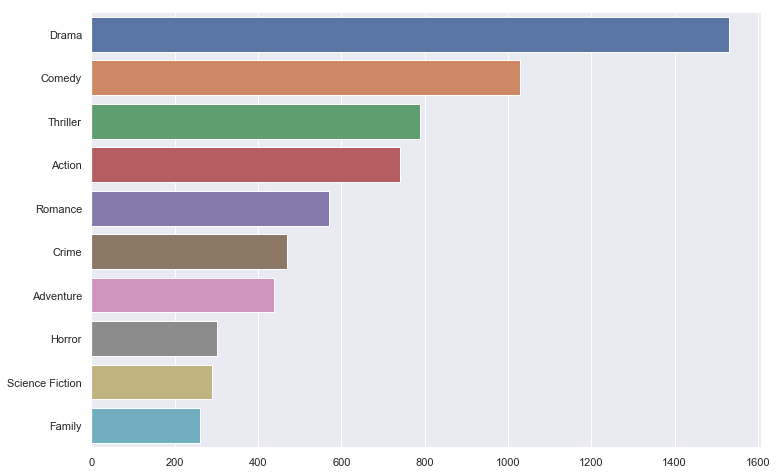

In [102]:
sns.barplot([value[1] for value in count],[key[0] for key in count]);

3. Production companies

In [108]:
production_df=train_df["production_companies"].apply(lambda x:[i["name"] for i in x] if x!={} else [])

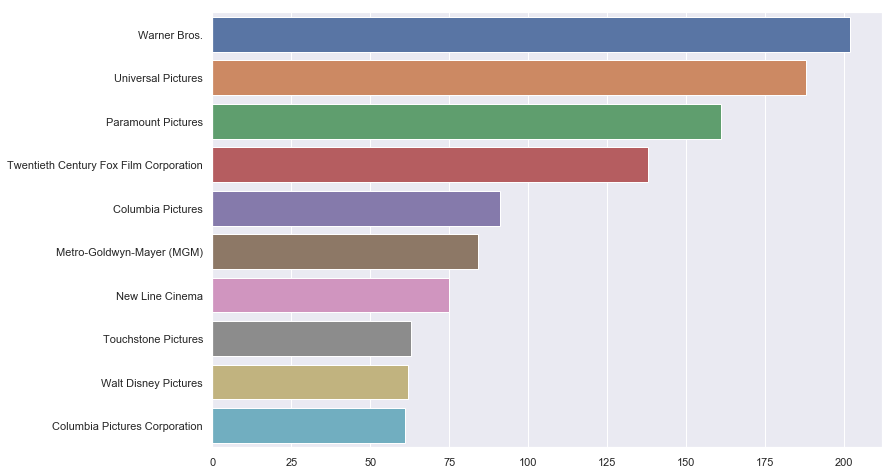

In [113]:
production_count=Counter([i for name in production_df for i in name]).most_common(10)
sns.barplot([i[1] for i in production_count],[i[0] for i in production_count])

4. Production countries

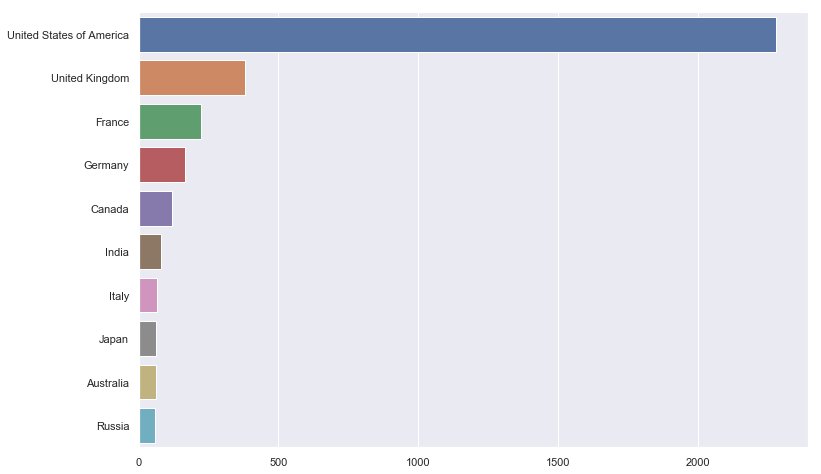

In [123]:
countries_df=train_df["production_countries"].apply(lambda x:[i["name"] for i in x] if x!={} else [])
countries_count=Counter([i for name in countries_df for i in name]).most_common(10)
sns.barplot([i[1] for i in countries_count],[i[0] for i in countries_count]);

5.Cast

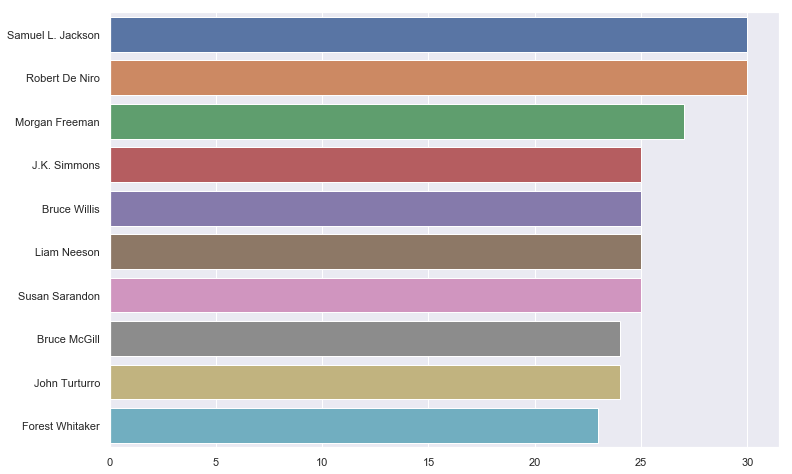

In [148]:
cast_name_df=train_df["cast"].apply(lambda x:[i["name"] for i in x] if x!={} else [])
cast_count=Counter([i for name in cast_name_df for i in name]).most_common(10)
sns.barplot([i[1] for i in cast_count],[i[0] for i in cast_count]);

Checking number of male and female actors. The dataset cast has gender classification with three class. So we will drop the gender class 0 as it has both male and female actress. Hence we will count only male as 2 and female as 1.

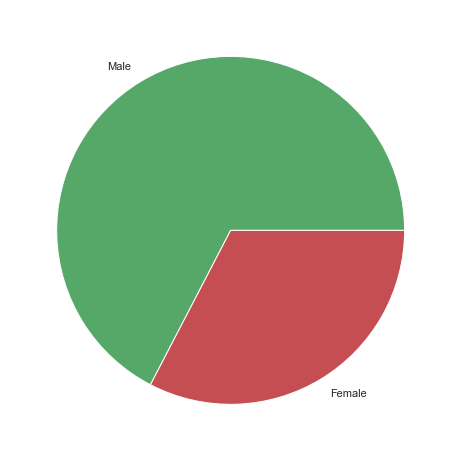

In [180]:
cast_gender_df=train_df["cast"].apply(lambda x:[i["gender"] for i in x] if x!={} else [])
gender_count=Counter([i for j in cast_gender_df for i in j]).most_common(10)
del gender_count[1]
plt.pie([gender_count[0][1],gender_count[1][1]],labels=["Male","Female"],colors="green");

Checking for top male and female actors

In [190]:
#Adding male actors in male list and demale in female list
male=[]
female=[]
for i in range(0,len(cast_gender_df)):
    for j in range(0,len(cast_gender_df[i])):
        if cast_gender_df[i][j]==2:
            male.append(cast_name_df[i][j])
        elif cast_gender_df[i][j]==1:
            female.append(cast_name_df[i][j])
        else:
            pass

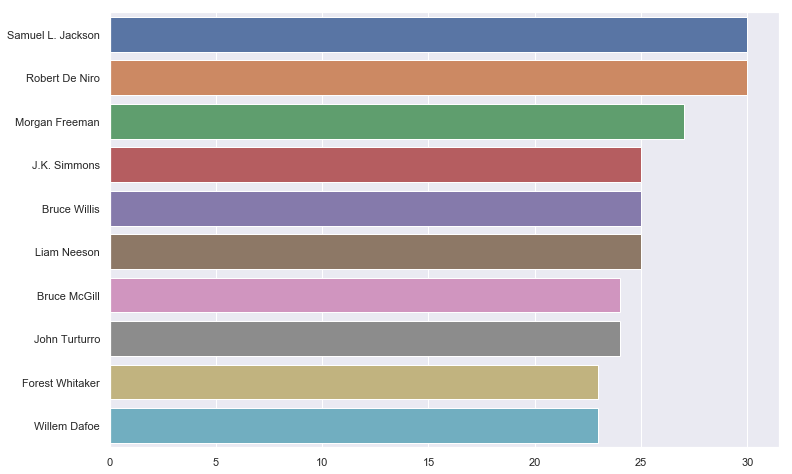

In [193]:
male_gender_count=Counter(male).most_common(10)
sns.barplot([i[1] for i in male_gender_count],[i[0] for i in male_gender_count]);

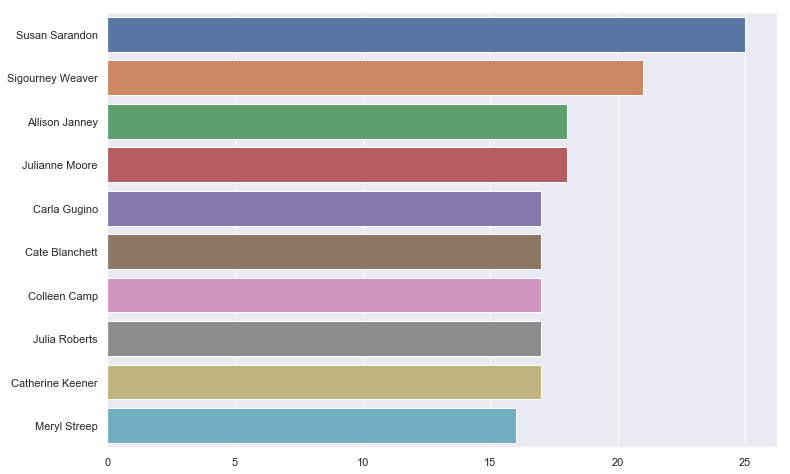

In [194]:
female_gender_count=Counter(female).most_common(10)
sns.barplot([i[1] for i in female_gender_count],[i[0] for i in female_gender_count]);